In [1]:
import pandas as pd
import numpy as np

In [2]:
# take only 50 images (25 Patient) Since a dataset is missing in the table 

In [3]:
pre_df = pd.read_csv("Pre-Image Calculated_Metrics.csv")
post_df = pd.read_csv("Post-Image Calculated_Metrics.csv")

In [4]:
pre_df = pre_df.iloc[:50, :6]
post_df = post_df[:50]

In [5]:
pre_df.shape, post_df.shape

((50, 6), (50, 6))

In [6]:
pre_df.head(10)

,Image Name,Probability Fractal Dimension,Capacity Fractal Dimension,Information Fractal Dimension,Correlation Fractal Dimension,Mean Lacunarity
0,1,1.793656,2.356637,1.743433,1.527033,1.042554
1,10,1.774180,2.343953,1.725464,1.509172,1.033621
2,11,1.779007,2.430267,1.808911,1.526387,1.051800
3,12,1.816722,2.307422,1.742456,1.622481,1.035351
4,13,1.780119,2.441498,1.832397,1.574729,1.048752
5,14,1.801964,2.403194,1.834497,1.681411,1.041950
6,15,1.799995,2.027392,1.552783,1.526751,1.010794
7,16,1.810007,2.040693,1.599390,1.600180,1.009743
8,17,1.751661,2.544013,1.947485,1.566132,1.064839
9,18,1.794685,2.417423,1.821899,1.617262,1.048289


In [7]:
post_df.head(10)

,Image Name,Probability Fractal Dimension,Capacity Fractal Dimension,Information Fractal Dimension,Correlation Fractal Dimension,Mean Lacunarity
0,1,1.832754,2.248731,1.720605,1.653726,1.027754
1,10,1.869251,2.218602,1.778394,1.766333,1.019467
2,11,1.836353,2.199394,1.672803,1.610959,1.023406
3,12,1.821403,2.284335,1.713086,1.589994,1.032484
4,13,1.800444,2.329317,1.731763,1.562216,1.035898
5,14,1.872234,2.189539,1.755005,1.751140,1.019041
6,15,1.937587,1.945716,1.782788,1.843602,1.004374
7,16,1.956753,2.037380,1.855566,1.894614,1.005038
8,17,1.807323,2.317271,1.728784,1.576671,1.036231
9,18,1.842281,2.285519,1.772388,1.709902,1.029257


# T Test (Statistical Inference)

In [8]:
from scipy import stats
np.random.seed(2020)

In [9]:
stats.ttest_ind(pre_df['Probability Fractal Dimension'],post_df['Probability Fractal Dimension'])

Ttest_indResult(statistic=-7.225748398666811, pvalue=1.0927239157008019e-10)

In [10]:
stats.ttest_ind(pre_df['Capacity Fractal Dimension'],post_df['Capacity Fractal Dimension'])

Ttest_indResult(statistic=4.583931431579951, pvalue=1.3473805003721934e-05)

In [11]:
stats.ttest_ind(pre_df['Information Fractal Dimension'],post_df['Information Fractal Dimension'])

Ttest_indResult(statistic=1.3800887735388288, pvalue=0.17069959138493393)

In [12]:
stats.ttest_ind(pre_df['Correlation Fractal Dimension'],post_df['Correlation Fractal Dimension'])

Ttest_indResult(statistic=-4.901870730114881, pvalue=3.761598796980787e-06)

In [13]:
stats.ttest_ind(pre_df['Mean Lacunarity'],post_df['Mean Lacunarity'])

Ttest_indResult(statistic=4.592763457513951, pvalue=1.3013051887946999e-05)

# K-Mean Clustering

In [14]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [15]:
# Input
t = 1
inp = pre_df.iloc[:, :1]
inp['Probability Fractal Dimension'] = post_df.iloc[:, t:t+1] - pre_df.iloc[:, t:t+1]
inp.shape

/Users/mdsharique/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(50, 2)

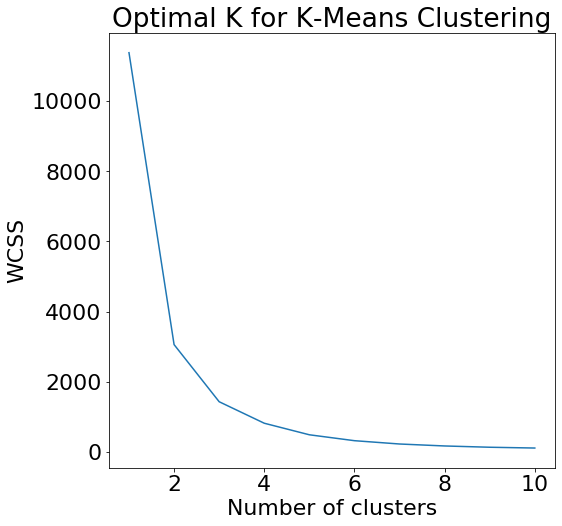

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2020)
    kmeans.fit(inp)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8, 8))
plt.rcParams.update({'font.size': 22})
plt.plot(range(1, 11), wcss)
plt.title('Optimal K for K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('kMeans-K.png', dpi = 100)
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 6, init='k-means++', max_iter = 600, n_init = 10, random_state = 2020)
inp['cluster'] = kmeans.fit_predict(inp)

/Users/mdsharique/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Visualization

In [64]:
X = np.array(inp)
cluster_list = inp['cluster']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
k = inp['cluster'].nunique()

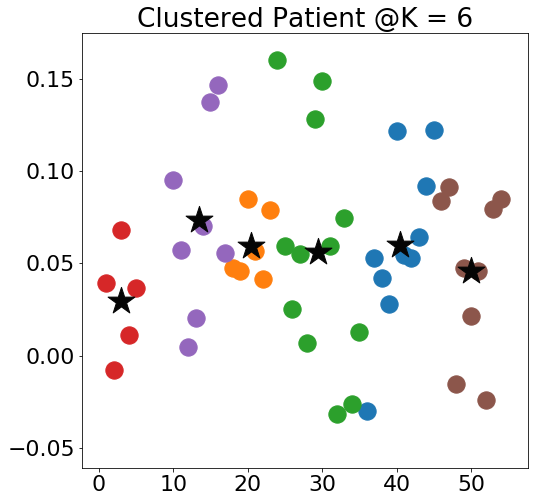

In [69]:
plt.figure(figsize = (8, 8))
plt.rcParams.update({'font.size': 22})
plt.title('Clustered Patient @K = 6')
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if cluster_list[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s = 300, c = colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '*', s = 800, c = '#050505')
#plt.savefig('kMeans.png', dpi = 100)

# Visualize two dataset

(1.75, 1.98)

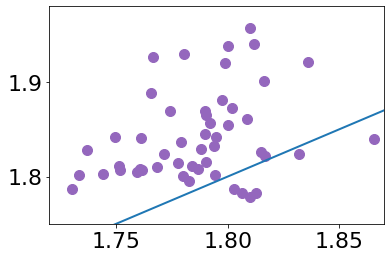

In [70]:
fig, ax = plt.subplots()
ax.scatter(pre_df.iloc[:, t:t+1], post_df.iloc[:, t:t+1], s = 100, c = colors[4])
ax.plot([1, 2], [1, 2], c = colors[0], linewidth = 2)
ax.set_xlim([1.72, 1.87])
ax.set_ylim([1.75, 1.98])

# T-SNE

In [76]:
from scipy import linalg
from sklearn.manifold import TSNE
import seaborn as sns
sns.set(rc = {'figure.figsize':(12, 12)})
palette = sns.color_palette("bright", 6)

In [77]:
# Dataset
t = 1
inp = post_df.iloc[:, 1:] - pre_df.iloc[:, 1:]
inp['Image Name'] = pre_df.iloc[:, :1]
inp.shape

(50, 6)

In [78]:
kmeans = KMeans(n_clusters = 6, init='k-means++', max_iter = 600, n_init = 10, random_state = 2020)
cluster = kmeans.fit_predict(inp)

In [79]:
tsne = TSNE()
X_embedded = tsne.fit_transform(inp)

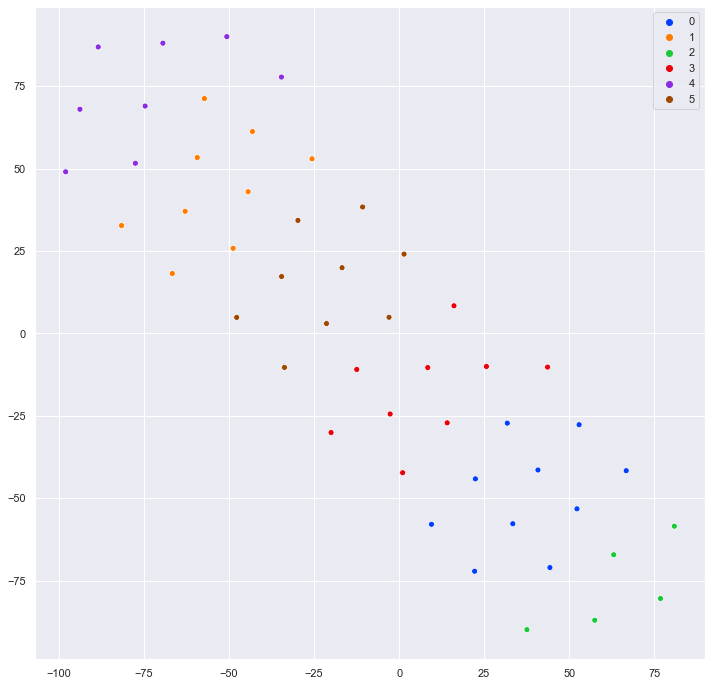

In [80]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = cluster, legend = 'full', palette = palette)